In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist 

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
# number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# image dimension
image_size = x_train.shape[1]


In [6]:
#resize and normalize
x_train = np.reshape(x_train,[-1,image_size,image_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,image_size,image_size])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# network parameters
input_shape = (image_size,image_size)
batch_size = 128
units = 256
dropout = 0.2

In [8]:
model = Sequential()

In [9]:
model.add(LSTM(units=units, dropout=dropout, input_shape = input_shape))

In [10]:
model.add(Dense(num_labels))

In [11]:
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               291840    
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


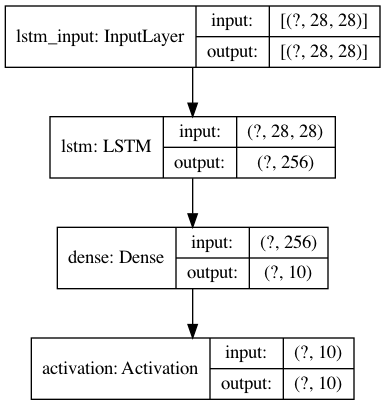

In [13]:
plot_model(model,to_file='lstm-mnist.png',show_shapes = True)

In [14]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs = 20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 76s 161ms/step - loss: 2.2316 - accuracy: 0.2451
Epoch 2/20
469/469 [==============================] - 79s 169ms/step - loss: 1.9036 - accuracy: 0.3519
Epoch 3/20
469/469 [==============================] - 78s 166ms/step - loss: 1.5419 - accuracy: 0.4881
Epoch 4/20
469/469 [==============================] - 76s 163ms/step - loss: 1.2231 - accuracy: 0.5912
Epoch 5/20
469/469 [==============================] - 74s 159ms/step - loss: 0.9738 - accuracy: 0.6716
Epoch 6/20
469/469 [==============================] - 74s 158ms/step - loss: 0.7938 - accuracy: 0.7347
Epoch 7/20
469/469 [==============================] - 74s 158ms/step - loss: 0.6621 - accuracy: 0.7847
Epoch 8/20
469/469 [==============================] - 73s 155ms/step - loss: 0.5483 - accuracy: 0.8232
Epoch 9/20
469/469 [==============================] - 74s 158ms/step - loss: 0.4623 - accuracy: 0.8523
Epoch 10/20
469/469 [==============================] - 73s 155ms/step - l

In [16]:
_ , acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)

79/79 [==============================] - 5s 69ms/step - loss: 0.1215 - accuracy: 0.9617


In [17]:
print("Test Accuracy: %.1f%%" %(100*acc))

Test Accuracy: 96.2%
